In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5e2756eb-0d4c-467f-9cb6-5a72f71a6898',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

/Users/arijitguchhait/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


{'status': {'timestamp': '2025-01-20T19:30:47.084Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 10694}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11868, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format','{:,.2f}'.format)
import os

In [3]:
pd.json_normalize(data).columns

Index(['data', 'status.timestamp', 'status.error_code', 'status.error_message',
       'status.elapsed', 'status.credit_count', 'status.notice',
       'status.total_count'],
      dtype='object')

In [4]:
def api_runner():
 from requests import Request, Session
import os
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5e2756eb-0d4c-467f-9cb6-5a72f71a6898',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
df2=pd.json_normalize(data['data'])
df2['timestamp']=pd.to_datetime("now")
df3=pd.DataFrame(df2)
df=pd.concat([df2,df3])
df

if not os.path.isfile(r'/Users/arijitguchhait/Desktop/Python/API.csv'):
 df.to_csv(r'/Users/arijitguchhait/Desktop/Python/API.csv',header=df.columns)
else:
   df.to_csv(r'/Users/arijitguchhait/Desktop/Python/API.csv',mode="a",header=False)
    

{'status': {'timestamp': '2025-01-20T19:30:51.390Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10694}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11868, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
df.describe()

,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,platform.id,timestamp
count,30.00,30.00,14.00,30.00,30.00,0.00,30.00,2.00,2.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,6.00,30
mean,"3,366.73","11,549.20","36,534,079,361.57","39,107,918,447.70","45,380,224,233.31",NaN,8.00,"3,009,569,341.53","13,375,434,521.39","7,179.42","42,911,873,146.90",70.55,0.53,-3.70,14.74,13.34,38.56,149.98,"214,749,796,211.96",6.01,"238,852,969,374.86","1,027.00",2025-01-20 14:30:51.333878784
min,1.00,307.00,"21,000,000.00","19,812,803.00","19,812,803.00",NaN,1.00,"3,009,569,341.53","13,375,434,521.39",0.24,"1,311,249,907.86",7.84,-0.52,-11.26,-1.40,-2.56,-6.63,-0.02,"13,335,906,652.69",0.37,"17,425,200,768.46","1,027.00",2025-01-20 14:30:51.333879
25%,590.25,836.75,"3,036,811,539.25","430,224,133.72","485,442,143.65",NaN,4.25,"3,009,569,341.53","13,375,434,521.39",0.59,"2,693,997,940.44",41.13,-0.01,-5.42,3.73,0.05,-0.09,28.40,"15,412,837,132.94",0.43,"26,029,748,240.83","1,027.00",2025-01-20 14:30:51.333879040
50%,"1,958.00","1,450.00","45,000,000,000.00","30,460,649,425.61","44,995,071,248.93",NaN,8.00,"3,009,569,341.53","13,375,434,521.39",3.18,"3,439,642,809.03",66.23,0.51,-3.05,10.98,6.66,10.00,53.04,"48,110,534,127.47",1.35,"48,110,534,127.47","1,027.00",2025-01-20 14:30:51.333879040
75%,"4,333.50","7,966.00","50,001,355,109.00","55,199,838,143.17","77,110,501,442.03",NaN,11.75,"3,009,569,341.53","13,375,434,521.39",194.26,"31,511,882,175.07",106.72,0.78,-0.89,25.75,24.85,62.59,177.12,"133,706,293,444.27",3.75,"145,003,410,564.71","1,027.00",2025-01-20 14:30:51.333879040
max,"20,947.00","113,904.00","100,000,000,000.00","147,705,126,383.71","147,705,126,383.71",NaN,15.00,"3,009,569,341.53","13,375,434,521.39","103,339.68","321,569,614,968.88",147.78,3.72,0.07,40.89,42.94,177.36,569.37,"2,047,448,792,799.47",57.35,"2,170,133,355,123.40","1,027.00",2025-01-20 14:30:51.333879
std,"5,134.18","28,590.50","34,602,180,318.39","48,925,944,807.80","51,050,631,001.82",NaN,4.39,0.00,0.00,"26,152.94","84,008,214,819.90",37.92,0.98,3.59,13.84,15.50,59.00,180.19,"508,382,633,198.94",14.24,"536,938,202,752.13",0.00,NaN


In [6]:
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print("API runner complted")
    sleep(60) #sleep for 1 minutes

exit()

API runner complted


KeyboardInterrupt: 

In [7]:
df.count()

id                                    30
name                                  30
symbol                                30
slug                                  30
num_market_pairs                      30
date_added                            30
tags                                  30
max_supply                            14
circulating_supply                    30
total_supply                          30
infinite_supply                       30
platform                               0
cmc_rank                              30
self_reported_circulating_supply       2
self_reported_market_cap               2
tvl_ratio                              0
last_updated                          30
quote.USD.price                       30
quote.USD.volume_24h                  30
quote.USD.volume_change_24h           30
quote.USD.percent_change_1h           30
quote.USD.percent_change_24h          30
quote.USD.percent_change_7d           30
quote.USD.percent_change_30d          30
quote.USD.percen

In [8]:
df2=df.groupby("name")[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d']].mean().stack()

In [9]:
df3=df2.to_frame("%Change").reset_index()
df3=df3.rename(columns={'level_1':'percentage_change'})

In [10]:
df3

,name,percentage_change,%Change
0,Avalanche,quote.USD.percent_change_1h,0.55
1,Avalanche,quote.USD.percent_change_24h,-5.75
2,Avalanche,quote.USD.percent_change_7d,8.85
3,BNB,quote.USD.percent_change_1h,0.17
4,BNB,quote.USD.percent_change_24h,-3.05
5,BNB,quote.USD.percent_change_7d,2.02
6,Bitcoin,quote.USD.percent_change_1h,-0.25
7,Bitcoin,quote.USD.percent_change_24h,-1.65
8,Bitcoin,quote.USD.percent_change_7d,12.18
9,Cardano,quote.USD.percent_change_1h,0.63


In [11]:
df3['percentage_change']=df3['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d'],['1h','24h','7d'])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

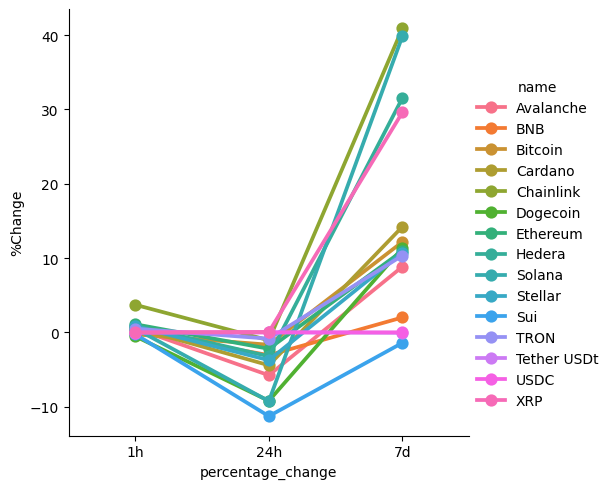

In [13]:
sns.catplot(x='percentage_change',y='%Change',hue='name',data=df3,kind='point')